In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\admin\Statistics\news_lenta_dataset.csv').drop('Unnamed: 0', axis=1)

In [45]:
df

,year,month,day,time,topic,header,content,author
0,2023,1,7,00:10,Мир,Пентагон отказался комментировать сообщения о ...,Заместитель помощника министра обороны США по ...,Марина Совина
1,2023,1,7,00:12,Мир,Байден во время выступления ошибся в дате штур...,Американский президент Джо Байден на мероприят...,Марина Совина
2,2023,1,7,00:22,Россия,В Центральную Россию придут морозы до 35 градусов,"Морозы до 35 градусов придут в Московскую, Яро...",Марина Совина
3,2023,1,7,00:23,Мир,Пентагон оценил ситуацию с военной помощью Укр...,Заместитель помощника главы Минобороны США по ...,Марина Совина
4,2023,1,7,00:29,Россия,Российский военнослужащий заявил о нарушении У...,Российский военнослужащий западной группировки...,Марина Совина
...,...,...,...,...,...,...,...,...
29077,2022,10,28,23:39,Мир,Генерал США согласился со словами Путина о мир...,Президент России Владимир Путин оказался прав ...,Юлия Мискевич
29078,2022,10,28,23:44,Россия,В России назвали конечную цель спецоперации на...,Глава крымского парламента Владимир Константин...,Марина Совина
29079,2022,10,28,23:46,Интернет и СМИ,Пушилин вручил орден Дружбы ведущему Первого к...,Врио главы Донецкой народной республики (ДНР) ...,Марина Совина
29080,2022,10,28,23:48,Мир,Суд в Норвегии арестовал обвиняемого в шпионаж...,Окружной суд Осло принял решение поместить под...,Марина Совина


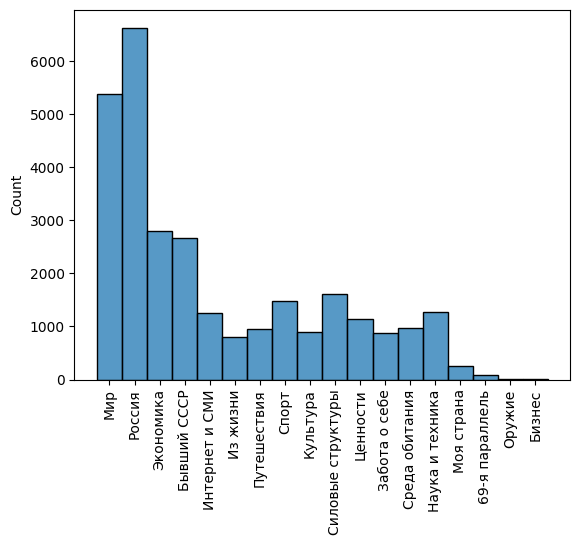

In [4]:
sns.histplot(df['topic'].to_list())
_ = plt.xticks(rotation=90)

## Пресдказание следующего слова

In [13]:
max_num_words = 1000
text = df[df.topic == 'Россия'].iloc[:2000]

In [42]:
text

array([[    0,     0,     0, ..., 11325,     2,    55],
       [    0,     0,     0, ...,  3556,  4424,  3966],
       [    0,     0,     0, ...,    66,  1418,  3235],
       ...,
       [    0,     0,     0, ..., 10576,   900,  1332],
       [    0,     0,     0, ...,     2,    38,  1969],
       [    0,     0,     0, ...,   140,     8,   510]])

In [15]:
text = ' '.join(text.content.str.strip().to_list())

In [16]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_num_words, lower=True, split=' ')
tokenizer.fit_on_texts([text])

In [17]:
data = tokenizer.texts_to_sequences([text])

In [18]:
# data = keras.utils.to_categorical(data[0], max_num_words)
data = data[0]

In [19]:
inp_words = 10
n = len(data) - inp_words

In [20]:
X = np.array([data[i:i+inp_words] for i in range(n)])
y = keras.utils.to_categorical(data[inp_words:])

In [21]:
X.shape

(181855, 10)

In [43]:
model = keras.Sequential([
    keras.layers.Embedding(max_num_words, 320, input_length=inp_words),
#     keras.layers.SimpleRNN(256, activation='tanh', return_sequences=True),
#     keras.layers.SimpleRNN(128, activation='tanh'),
    keras.layers.LSTM(128),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(max_num_words, activation='softmax')
])

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10, 320)           320000    
                                                                 
 lstm_4 (LSTM)               (None, 128)               229888    
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 1000)              257000    
                                                                 
Total params: 839,912
Trainable params: 839,912
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [46]:
history = model.fit(X, y, batch_size=32, epochs=10, validation_split=.3)

Epoch 1/10
3979/3979 [==============================] - 33s 8ms/step - loss: 5.0742 - accuracy: 0.1587 - val_loss: 4.6175 - val_accuracy: 0.2042
Epoch 2/10
3979/3979 [==============================] - 35s 9ms/step - loss: 4.2008 - accuracy: 0.2455 - val_loss: 4.3964 - val_accuracy: 0.2326
Epoch 3/10
3979/3979 [==============================] - 39s 10ms/step - loss: 3.8866 - accuracy: 0.2716 - val_loss: 4.3618 - val_accuracy: 0.2399
Epoch 4/10
3979/3979 [==============================] - 34s 9ms/step - loss: 3.6526 - accuracy: 0.2917 - val_loss: 4.3823 - val_accuracy: 0.2438
Epoch 5/10
3979/3979 [==============================] - 32s 8ms/step - loss: 3.4520 - accuracy: 0.3109 - val_loss: 4.4914 - val_accuracy: 0.2441
Epoch 6/10
3979/3979 [==============================] - 32s 8ms/step - loss: 3.2700 - accuracy: 0.3292 - val_loss: 4.5955 - val_accuracy: 0.2445
Epoch 7/10
3979/3979 [==============================] - 31s 8ms/step - loss: 3.0976 - accuracy: 0.3474 - val_loss: 4.7647 - val_a

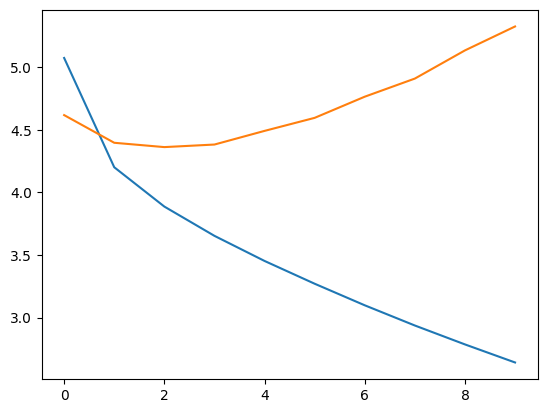

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

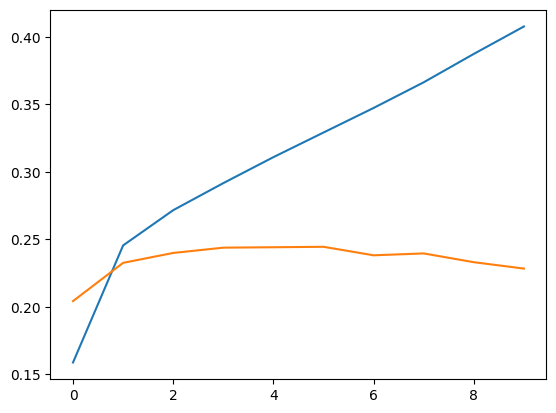

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [49]:
text = 'на украине по его словам в начале декабря стало известно'.split()
for i in range(150):
    index = np.argmax(model.predict(tokenizer.texts_to_sequences([text[i:]]), verbose=0))
    text.append(tokenizer.index_word[index])
print(' '.join(text))

на украине по его словам в начале декабря стало известно что в россии в москве проект по ее данным и — это в — это в — сказал он ранее президент россии владимир путин заявил что в стране люди в стране в стране нельзя что в 2023 году в 2023 году на украину и в году в 2023 году на новых в том числе и на новых наемников в состав россии была — и — подчеркнул он ранее президент россии владимир путин поручил минобороны ввести режим прекращения огня по всей линии в зоне специальной военной операции сво на видео работа цели комплекса с 300 в минобороны что боевые машины находились кроме того были уничтожены две системы залпового огня рсзо himars в сша об этом в понедельник 2 января журналистам сообщили в минобороны россии согласно военные вс рф в районе населенного пункта в днр в районах населенных пунктов харьковской области и днр были уничтожены три системы производства сша 24 февраля было


## Тема новости

In [82]:
max_len_header = 100

news = df[(df.topic != 'Моя страна') & (df.topic != '69-я параллель') & (df.topic != 'Бизнес') & (df.topic != 'Оружие')].copy()

headers = news.header[~news.topic.isna()].to_list()
topics = news.topic[~news.topic.isna()].copy()  # 19 штук

In [83]:
tokenizer = keras.preprocessing.text.Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(headers)

In [84]:
text = tokenizer.texts_to_sequences(headers)

In [85]:
text = keras.utils.pad_sequences(text, maxlen=max_len_header)

In [86]:
text, text.shape

(array([[    0,     0,     0, ..., 11177,     2,    55],
        [    0,     0,     0, ...,  3501,  4370,  3914],
        [    0,     0,     0, ...,    65,  1398,  3915],
        ...,
        [    0,     0,     0, ..., 10445,   896,  1320],
        [    0,     0,     0, ...,     2,    38,  1948],
        [    0,     0,     0, ...,   139,     8,   506]]),
 (28727, 100))

In [87]:
tipic_names = []

for i, name_topic in enumerate(np.unique(topics.to_list())):
    print(i, name_topic)
    tipic_names.append(name_topic)
    topics[topics == name_topic] = i

0 Бывший СССР
1 Забота о себе
2 Из жизни
3 Интернет и СМИ
4 Культура
5 Мир
6 Наука и техника
7 Путешествия
8 Россия
9 Силовые структуры
10 Спорт
11 Среда обитания
12 Ценности
13 Экономика


In [48]:
topics, np.unique(topics).shape

(0        5
 1        5
 2        8
 3        5
 4        8
         ..
 29077    5
 29078    8
 29079    3
 29080    5
 29081    5
 Name: topic, Length: 28727, dtype: object,
 (14,))

In [49]:
num_topic = np.unique(topics).shape[0]
topics = keras.utils.to_categorical(topics, num_topic)

In [68]:
model = keras.Sequential([
    keras.layers.Embedding(text.max(), 32, input_length=max_len_header),
    keras.layers.LSTM(64),
    keras.layers.Dense(num_topic, activation='softmax')
])

In [69]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 32)           1130016   
                                                                 
 lstm_9 (LSTM)               (None, 64)                24832     
                                                                 
 dense_12 (Dense)            (None, 14)                910       
                                                                 
Total params: 1,155,758
Trainable params: 1,155,758
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
history = model.fit(text, topics, batch_size=32, epochs=10, validation_split=.3)

Epoch 1/10
629/629 [==============================] - 10s 14ms/step - loss: 1.8893 - accuracy: 0.3964 - val_loss: 1.4507 - val_accuracy: 0.5447
Epoch 2/10
629/629 [==============================] - 8s 13ms/step - loss: 0.9428 - accuracy: 0.7119 - val_loss: 1.1447 - val_accuracy: 0.6595
Epoch 3/10
629/629 [==============================] - 8s 13ms/step - loss: 0.4122 - accuracy: 0.8843 - val_loss: 1.1427 - val_accuracy: 0.6807
Epoch 4/10
629/629 [==============================] - 9s 14ms/step - loss: 0.1682 - accuracy: 0.9561 - val_loss: 1.2274 - val_accuracy: 0.6823
Epoch 5/10
629/629 [==============================] - 8s 13ms/step - loss: 0.0777 - accuracy: 0.9796 - val_loss: 1.4149 - val_accuracy: 0.6754
Epoch 6/10
629/629 [==============================] - 9s 14ms/step - loss: 0.0434 - accuracy: 0.9902 - val_loss: 1.5243 - val_accuracy: 0.6641
Epoch 7/10
629/629 [==============================] - 9s 15ms/step - loss: 0.0280 - accuracy: 0.9931 - val_loss: 1.6177 - val_accuracy: 0.680

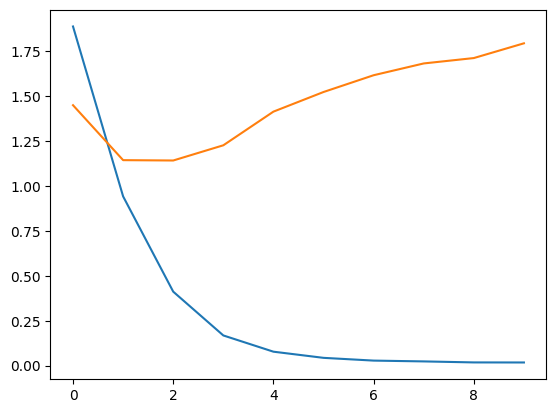

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

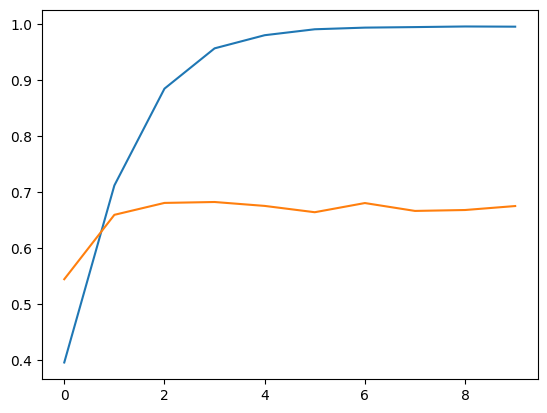

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [92]:
news[['header', 'topic']].head(40)

,header,topic
0,Пентагон отказался комментировать сообщения о ...,Мир
1,Байден во время выступления ошибся в дате штур...,Мир
2,В Центральную Россию придут морозы до 35 градусов,Россия
3,Пентагон оценил ситуацию с военной помощью Укр...,Мир
4,Российский военнослужащий заявил о нарушении У...,Россия
5,Путин приехал на рождественское богослужение в...,Россия
6,Украинские войска за сутки 20 раз обстреляли ДНР,Россия
7,Пентагон сообщил о планах передать Украине ави...,Мир
8,Кандидат на пост спикера палаты представителей...,Мир
9,Россиянам напомнили о росте пенсий с января,Экономика


In [118]:
t = "Ван Гог дропнул новую картину".lower()
data = tokenizer.texts_to_sequences([t])
data_pad = keras.utils.pad_sequences(data, maxlen=max_len_header)

In [119]:
tipic_names[np.argmax(model.predict(data_pad, verbose=0))]

'Культура'